# Beatles Songs - Classification

Os Beatles são definitivamente a coisa mais importante que aconteceu para a música popular até hoje. Eles ficaram marcados nos seus primeiros anos por suas músicas mais "dançantes" como os rocks dos anos 50, letras românticas e arranjos musicais simples, esta era deles é comumente chamada como **"Yeah-yeahs"**. 
Porém ao longo da carreira da banda, eles foram amadurecendo musicalmente e passando por uma forte transição no que eram suas composições, esta transição começou no álbum "Rubber Soul", mas se deu definitivamente no **"Revolver"**, álbum este que revolucionou a indústria musical à época. A partir do Revolver os Beatles se caracterizaram por letras de caráter mais existencial, musicas mais lentas, arranjos mais complexos e um experimentalismo vanguardista. Como ícones da contracultura e por consequência do que viria se tornar a cultura "hippie", devido a isso, ao nível de produção revolucionário e ao experimentalismo extremo, esta era ficou conhecida como a era da **"Revolução Musical"**.

Um algoritmo de *Machine Learning* poderia identificar a que fase uma música dos Beatles pertence, baseado em suas características extraídas da plataforma de *streaming* Spotify?

###  Fase "Yeah-Yeahs"
<img src="assets/yeah.jpg" alt="drawing" width="600" height=auto/>

### Fase "Musical Revolution"
<img src="assets/hippie.jpg" alt="drawing" width="600" height=auto/>

In [1]:
#Import de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from matplotlib.colors import ListedColormap
import warnings
import IPython
import statistics


warnings.filterwarnings('ignore')

In [2]:
#Declaração de algumas funções

def MinMax(x):
    
    def Min(x,i):
        minimum=x[x.iloc[:, i]==x.iloc[:, i].min()].iloc[0, [0, i]][0]
        return minimum

    def Max(x,i):
        maximum=x[x.iloc[:, i]==x.iloc[:, i].max()].iloc[0, [0, i]][0]
        return maximum
    
    Index=x.columns[1:len(x.columns)-1].str.title();
    Minlist=[];
    Maxlist=[];
    for i in range(1,len(x.columns)-1,1):
        Minlist.append(Min(x,i));
        Maxlist.append(Max(x,i));
    MinMax=pd.DataFrame(zip(Minlist, Maxlist), columns=['Min', 'Max'], index=Index);
    return MinMax;

## Processamento da base de dados

### Leitura da base de dados

In [3]:
beatles_songs=pd.read_csv("TheBeatlesRaw.csv");
beatles_songs

,id,year,album,song,danceability,energy,key,loudness,mode,speechiness,...,Column16357,Column16358,Column16359,Column16360,Column16361,Column16362,Column16363,Column16364,Column16365,Column16366
0,1,1963,Please Please Me,I Saw Her Standing There,0.491,0.801,4,-9.835,1,0.0361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1963,Please Please Me,Misery,0.591,0.605,0,-10.925,1,0.0413,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1963,Please Please Me,Anna,0.608,0.565,2,-11.060,1,0.0336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1963,Please Please Me,Chains,0.654,0.561,10,-10.551,1,0.0304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1963,Please Please Me,Boys,0.402,0.86,4,-10.310,1,0.0504,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,1970,Let It Be,ive got a feeling,0.440,0.609,2,-8.824,1,0.0358,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,190,1970,Let It Be,one after 909,0.554,0.828,4,-6.435,1,0.0739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,191,1970,Let It Be,the long and winding road,0.299,0.329,3,-10.096,1,0.0279,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,192,1970,Let It Be,for you blue,0.880,0.556,2,-10.773,1,0.0855,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Verificando colunas com valores vazios

In [4]:
beatles_songs.isna().any()

id              False
year            False
album           False
song            False
danceability    False
                ...  
Column16362      True
Column16363      True
Column16364      True
Column16365      True
Column16366      True
Length: 16384, dtype: bool

### Limpando colunas com valores vazios

In [5]:
beatles_songs.dropna(axis='columns',inplace=True);
beatles_songs

,id,year,album,song,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spotify_id,duration_ms,time_signature
0,1,1963,Please Please Me,I Saw Her Standing There,0.491,0.801,4,-9.835,1,0.0361,0.2700,0.00000,0.0665,0.971,160.109,3KiexfmhxHvG5IgAElmTkd,173947,4
1,2,1963,Please Please Me,Misery,0.591,0.605,0,-10.925,1,0.0413,0.7070,0.00000,0.3090,0.882,133.348,40qXGg5nRbcWzcFb26KWkQ,108547,4
2,3,1963,Please Please Me,Anna,0.608,0.565,2,-11.060,1,0.0336,0.6350,0.00000,0.0601,0.835,109.286,2baEFuU0gQon0hgVRioI1o,177133,4
3,4,1963,Please Please Me,Chains,0.654,0.561,10,-10.551,1,0.0304,0.6080,0.00000,0.1290,0.929,129.884,3JQWLa88R35d971o5bIImd,145080,4
4,5,1963,Please Please Me,Boys,0.402,0.86,4,-10.310,1,0.0504,0.6070,0.00000,0.7360,0.822,142.445,7JxGM1R32ZqfwZou3VtnTg,146440,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,1970,Let It Be,ive got a feeling,0.440,0.609,2,-8.824,1,0.0358,0.0715,0.00000,0.5820,0.364,165.156,3gwRWIbr5ycEVLIAXrWaw7,217560,4
189,190,1970,Let It Be,one after 909,0.554,0.828,4,-6.435,1,0.0739,0.0307,0.00000,0.9070,0.888,90.95,50qHmeex1nPTyQTwBXjSE4,173960,4
190,191,1970,Let It Be,the long and winding road,0.299,0.329,3,-10.096,1,0.0279,0.7560,0.01050,0.0559,0.392,132.282,3mlMpmY8oZIBFc39D9zLbh,218187,4
191,192,1970,Let It Be,for you blue,0.880,0.556,2,-10.773,1,0.0855,0.2400,0.04830,0.2400,0.955,128.542,5dpRJkvY8oWMQmQbEQTXhO,152213,4


### Verificando se ainda há valores vazios no dataframe

In [6]:
beatles_songs.isna().sum()

id                  0
year                0
album               0
song                0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
spotify_id          0
duration_ms         0
time_signature      0
dtype: int64

### Ajustando índice

In [7]:
beatles_songs.set_index('id', inplace=True);
beatles_songs

,year,album,song,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spotify_id,duration_ms,time_signature
id,,,,,,,,,,,,,,,,,
1,1963,Please Please Me,I Saw Her Standing There,0.491,0.801,4,-9.835,1,0.0361,0.2700,0.00000,0.0665,0.971,160.109,3KiexfmhxHvG5IgAElmTkd,173947,4
2,1963,Please Please Me,Misery,0.591,0.605,0,-10.925,1,0.0413,0.7070,0.00000,0.3090,0.882,133.348,40qXGg5nRbcWzcFb26KWkQ,108547,4
3,1963,Please Please Me,Anna,0.608,0.565,2,-11.060,1,0.0336,0.6350,0.00000,0.0601,0.835,109.286,2baEFuU0gQon0hgVRioI1o,177133,4
4,1963,Please Please Me,Chains,0.654,0.561,10,-10.551,1,0.0304,0.6080,0.00000,0.1290,0.929,129.884,3JQWLa88R35d971o5bIImd,145080,4
5,1963,Please Please Me,Boys,0.402,0.86,4,-10.310,1,0.0504,0.6070,0.00000,0.7360,0.822,142.445,7JxGM1R32ZqfwZou3VtnTg,146440,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1970,Let It Be,ive got a feeling,0.440,0.609,2,-8.824,1,0.0358,0.0715,0.00000,0.5820,0.364,165.156,3gwRWIbr5ycEVLIAXrWaw7,217560,4
190,1970,Let It Be,one after 909,0.554,0.828,4,-6.435,1,0.0739,0.0307,0.00000,0.9070,0.888,90.95,50qHmeex1nPTyQTwBXjSE4,173960,4
191,1970,Let It Be,the long and winding road,0.299,0.329,3,-10.096,1,0.0279,0.7560,0.01050,0.0559,0.392,132.282,3mlMpmY8oZIBFc39D9zLbh,218187,4


### Removendo informações irrelevantes

As informações 'instrumentalness', 'tempo', 'spotify_id', 'time_signature', 'key', 'mode', 'loudness' são irrelevantes para o problema, logo podem ser excluídas do dataframe.

In [8]:
beatles_songs.drop(
    ['instrumentalness', 'tempo', 'spotify_id', 'time_signature', 'key', 'mode', 'loudness']
    , 1, inplace=True);
beatles_songs

,year,album,song,danceability,energy,speechiness,acousticness,liveness,valence,duration_ms
id,,,,,,,,,,
1,1963,Please Please Me,I Saw Her Standing There,0.491,0.801,0.0361,0.2700,0.0665,0.971,173947
2,1963,Please Please Me,Misery,0.591,0.605,0.0413,0.7070,0.3090,0.882,108547
3,1963,Please Please Me,Anna,0.608,0.565,0.0336,0.6350,0.0601,0.835,177133
4,1963,Please Please Me,Chains,0.654,0.561,0.0304,0.6080,0.1290,0.929,145080
5,1963,Please Please Me,Boys,0.402,0.86,0.0504,0.6070,0.7360,0.822,146440
...,...,...,...,...,...,...,...,...,...,...
189,1970,Let It Be,ive got a feeling,0.440,0.609,0.0358,0.0715,0.5820,0.364,217560
190,1970,Let It Be,one after 909,0.554,0.828,0.0739,0.0307,0.9070,0.888,173960
191,1970,Let It Be,the long and winding road,0.299,0.329,0.0279,0.7560,0.0559,0.392,218187


### Adicionando atributo alvo

O atributo alvo do nosso problema é a era em que a música dos Beatles foi concebida, sabe-se que à partir do álbum "Revolver" houve esta mudança de fase da banda, usaremos esta informação para auxiliar na rotulação do atributo alvo.<br />
Com isto verificamos as músicas que são do álbum **"Revolver"**

In [9]:
beatles_songs[beatles_songs["album"]=="Revolver"]

,year,album,song,danceability,energy,speechiness,acousticness,liveness,valence,duration_ms
id,,,,,,,,,,
84,1966,Revolver,taxman,0.469,0.596,0.0749,0.010100,0.3210,0.7830,158853
85,1966,Revolver,eleanor rigby,0.581,0.28,0.0381,0.936000,0.3050,0.8130,126533
86,1966,Revolver,im only sleeping,0.494,0.47,0.0301,0.210000,0.2800,0.6980,180320
87,1966,Revolver,love you to,0.391,0.593,0.0413,0.700000,0.0829,0.7070,179827
88,1966,Revolver,"here, there and everywhere",0.290,0.247,0.0383,0.921000,0.0917,0.3600,144880
89,1966,Revolver,yellow submarine,0.604,0.549,0.0389,0.531000,0.4380,0.6960,158880
90,1966,Revolver,she said she said,0.329,0.678,0.0344,0.103000,0.8430,0.6720,156040
91,1966,Revolver,good day sunshine,0.770,0.496,0.0468,0.719000,0.1230,0.5710,129293
92,1966,Revolver,and your bird can sing,0.555,0.65,0.0282,0.006700,0.2360,0.9660,120493


Como as músicas estão em ordem cronológica no dataframe, utilizamos a primeira música do álbum **"Revolver"** como referência e todas as músicas prévias a esta são rotuladas como **"Yeah-yeahs"**, ao passo que as demais são rotuladas como **"Musical Revolution"**.<br />
Verifica-se que a atribuição foi feita com sucesso através de uma rápida visualização do dataframe 

In [10]:
startNewEra=beatles_songs[beatles_songs["album"]=="Revolver"].iloc[0].name;
beatles_songs['phase']='';
beatles_songs.loc[1:startNewEra, 'phase']="Yeah-Yeahs";
beatles_songs.loc[beatles_songs['phase']!="Yeah-Yeahs", 'phase']="Musical Revolution";
beatles_songs

,year,album,song,danceability,energy,speechiness,acousticness,liveness,valence,duration_ms,phase
id,,,,,,,,,,,
1,1963,Please Please Me,I Saw Her Standing There,0.491,0.801,0.0361,0.2700,0.0665,0.971,173947,Yeah-Yeahs
2,1963,Please Please Me,Misery,0.591,0.605,0.0413,0.7070,0.3090,0.882,108547,Yeah-Yeahs
3,1963,Please Please Me,Anna,0.608,0.565,0.0336,0.6350,0.0601,0.835,177133,Yeah-Yeahs
4,1963,Please Please Me,Chains,0.654,0.561,0.0304,0.6080,0.1290,0.929,145080,Yeah-Yeahs
5,1963,Please Please Me,Boys,0.402,0.86,0.0504,0.6070,0.7360,0.822,146440,Yeah-Yeahs
...,...,...,...,...,...,...,...,...,...,...,...
189,1970,Let It Be,ive got a feeling,0.440,0.609,0.0358,0.0715,0.5820,0.364,217560,Musical Revolution
190,1970,Let It Be,one after 909,0.554,0.828,0.0739,0.0307,0.9070,0.888,173960,Musical Revolution
191,1970,Let It Be,the long and winding road,0.299,0.329,0.0279,0.7560,0.0559,0.392,218187,Musical Revolution


### Removemendo outras informações.

As informações à cerca do ano de lançamento da música são removidas, pois podem tornar o problema redudante e não haver desafios para o algoritmo de ML(*Machine Learning*), pois à partir do ano de 1966 há a ruptura e mudança de eras, o que também descaracterizaria o problema, visto que a intenção é classificar devido a características da música, não devido a informações correlatas a sua data de lançamento. A informação à cerca do álbum que a música pertence também é removida seguindo o mesmo pensamento lógico aplicado para o "ano".<br />
Deixa-se a coluna "song" como coluna rótulo e por puras questões estéticas, deixamos todos os elementos da coluna começando com letra maiúscula.

In [11]:
beatles_songs.drop(['year', 'album'], 1, inplace=True);
beatles_songs['song']=beatles_songs['song'].str.title();
beatles_songs

,song,danceability,energy,speechiness,acousticness,liveness,valence,duration_ms,phase
id,,,,,,,,,
1,I Saw Her Standing There,0.491,0.801,0.0361,0.2700,0.0665,0.971,173947,Yeah-Yeahs
2,Misery,0.591,0.605,0.0413,0.7070,0.3090,0.882,108547,Yeah-Yeahs
3,Anna,0.608,0.565,0.0336,0.6350,0.0601,0.835,177133,Yeah-Yeahs
4,Chains,0.654,0.561,0.0304,0.6080,0.1290,0.929,145080,Yeah-Yeahs
5,Boys,0.402,0.86,0.0504,0.6070,0.7360,0.822,146440,Yeah-Yeahs
...,...,...,...,...,...,...,...,...,...
189,Ive Got A Feeling,0.440,0.609,0.0358,0.0715,0.5820,0.364,217560,Musical Revolution
190,One After 909,0.554,0.828,0.0739,0.0307,0.9070,0.888,173960,Musical Revolution
191,The Long And Winding Road,0.299,0.329,0.0279,0.7560,0.0559,0.392,218187,Musical Revolution


### Verificando inconformidades de tipos

Verifica-se se alguma coluna é de algum tipo de dado que não é coerente com ela. Com isto pode-se perceber que a coluna "energy" que esperava-se ser do tipo **float64**, é na verdade do tipo **object**, isto deve ser tratado.

In [12]:
beatles_songs.dtypes

song             object
danceability    float64
energy           object
speechiness     float64
acousticness    float64
liveness        float64
valence         float64
duration_ms       int64
phase            object
dtype: object

Há 32 elementos na coluna "energy" que são do tipo **str**, filtra-se quais são esses elementos, verifica-se se há incoformidades nos valores e por fim eles são convertidos para o tipo **float**

In [13]:
beatles_songs['energy'].apply(type).value_counts()

<class 'float'>    161
<class 'str'>       32
Name: energy, dtype: int64

Através de uma rápida verificação manual, percebe-se que o elemento 111 contém um parêntese onde esperava-se por um 0, a correção será feita manualmente.

In [14]:
beatles_songs[beatles_songs['energy'].apply(lambda x: isinstance(x, str))]

,song,danceability,energy,speechiness,acousticness,liveness,valence,duration_ms,phase
id,,,,,,,,,
97,Tomorrow Never Knows,0.380,0.829,0.0405,0.000084,0.3420,0.0534,179547,Musical Revolution
98,Sgt.Peppers Lonely Hearts Club Band,0.451,0.673,0.0734,0.085700,0.7970,0.5830,122893,Musical Revolution
99,With A Little Help From My Friends,0.705,0.515,0.0337,0.365000,0.3890,0.8030,164107,Musical Revolution
100,Lucy In The Sky With Diamonds,0.311,0.325,0.0283,0.046900,0.1390,0.6680,208467,Musical Revolution
101,Getting Better,0.632,0.471,0.0348,0.313000,0.0712,0.7640,168120,Musical Revolution
102,Fixing A Hole,0.469,0.507,0.0451,0.382000,0.0783,0.6190,156827,Musical Revolution
103,Shes Leaving Home,0.381,0.214,0.0337,0.944000,0.1060,0.3930,215160,Musical Revolution
104,Being For The Benefit Of Mr.Kite!,0.526,0.413,0.0446,0.338000,0.0992,0.7100,157533,Musical Revolution
105,Within You Without You,0.352,0.479,0.0338,0.339000,0.4860,0.3540,304667,Musical Revolution


Após a correção e conversão dos dados, verifica-se que a coluna "energy" passa a ser do tipo **"float64"**, assim como esperado.

In [15]:
beatles_songs.loc[111, 'energy']="0.613";
beatles_songs['energy']=pd.to_numeric(beatles_songs['energy'])
beatles_songs.dtypes

song             object
danceability    float64
energy          float64
speechiness     float64
acousticness    float64
liveness        float64
valence         float64
duration_ms       int64
phase            object
dtype: object

### Normalizando dados com valores discrepantes aos demais

Normaliza-se o atributo **"duration_ms"**, pois ele é cerca de 5 ordens superior as demais atributos, o que pode causar um vício em determinados tipos de algoritmos de ML, comprometendo assim os resultados.<br />
Após a normalização ele passa a ser da mesma ordem dos demais, assim tornando o dataframe mais coeso

In [16]:
beatles_songs['duration_ms']=((beatles_songs['duration_ms']-beatles_songs['duration_ms'].min())/
                    (beatles_songs['duration_ms'].max()-beatles_songs['duration_ms'].min()))
beatles_songs

,song,danceability,energy,speechiness,acousticness,liveness,valence,duration_ms,phase
id,,,,,,,,,
1,I Saw Her Standing There,0.491,0.801,0.0361,0.2700,0.0665,0.971,0.310823,Yeah-Yeahs
2,Misery,0.591,0.605,0.0413,0.7070,0.3090,0.882,0.173436,Yeah-Yeahs
3,Anna,0.608,0.565,0.0336,0.6350,0.0601,0.835,0.317516,Yeah-Yeahs
4,Chains,0.654,0.561,0.0304,0.6080,0.1290,0.929,0.250182,Yeah-Yeahs
5,Boys,0.402,0.860,0.0504,0.6070,0.7360,0.822,0.253039,Yeah-Yeahs
...,...,...,...,...,...,...,...,...,...
189,Ive Got A Feeling,0.440,0.609,0.0358,0.0715,0.5820,0.364,0.402442,Musical Revolution
190,One After 909,0.554,0.828,0.0739,0.0307,0.9070,0.888,0.310851,Musical Revolution
191,The Long And Winding Road,0.299,0.329,0.0279,0.7560,0.0559,0.392,0.403759,Musical Revolution


## Análise Estatística

## O que é cada atributo?
<br />
Segundo a documentação do dataset:

- **song**: Specific song that is analyzed in row.
- **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- **duration_ms** : Music duration in ms.

###  O que métricas estatísticas nos dizem?

#### Máximos e Mínimos

Podemos visualizar bem os significados do atributos olhando para as canções que possuem o menor valor e o maior valor de certo atributo. Como por exemplo o atributo **Energy**, a música ***Pepperland Laid Waste*** possui o menor valor deste atributo, se trata de uma música instrumental, a mesma se caracteriza por uma progressão lenta e um ritmo devagar, muito oposta a ***Back In The USSR*** que possui o maior valor de **Energy** e é uma música rápida e cheia de "movimentação".

**Listen:**

<a href="https://www.youtube.com/watch?v=JGauvWfU-eY&ab_channel=GeorgeMartin-Topic" target="_top">🎻***Pepperland Laid Waste***🎻</a>

<a href="https://www.youtube.com/watch?v=nS5_EQgbuLc&ab_channel=TheBeatlesVEVO" target="_top">🎸***Back in the USSR***🎸</a>

In [17]:
MinMax(beatles_songs)

,Min,Max
Danceability,Good Night,For You Blue
Energy,Pepperland Laid Waste,Back In The Ussr
Speechiness,Octopus'S Garden,Revolution 9
Acousticness,Its All Too Much,Sea Of Time
Liveness,Twist And Shout,A Day In The Life
Valence,Sea Of Holes,"Obi-La -Di, Ob-La-Da"
Duration_Ms,Her Majesty,Revolution 9


#### Os beatles foram mais produtivos em quantidade de composições na sua segunda etapa da carreira!

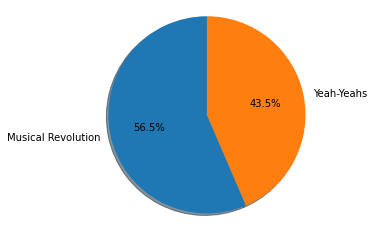

In [18]:
labels=beatles_songs['phase'].value_counts().index.to_list();
values=beatles_songs['phase'].value_counts().to_list();
fig1, ax1 = plt.subplots();
ax1.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90);
ax1.axis('equal');
plt.show()

#### Média

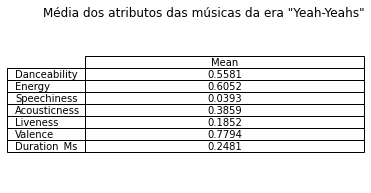

In [19]:
labels=beatles_songs[beatles_songs['phase']=="Yeah-Yeahs"].mean(numeric_only=True).index.to_list();
m=beatles_songs[beatles_songs['phase']=="Yeah-Yeahs"].mean(numeric_only=True).values.tolist();
mdf=pd.DataFrame(m, labels);
mdf.columns=['Mean'];
mdf['Mean']=round(mdf['Mean'],4);

fig = plt.figure(figsize = (5, 3))
ax = fig.add_subplot(111)

ax.table(cellText = mdf.values,
          rowLabels = mdf.index.str.title(),
          colLabels = mdf.columns,
          loc = "center",
          cellLoc = "center"
         )
ax.set_title('Média dos atributos das músicas da era "Yeah-Yeahs"',loc='right')

ax.axis("off");

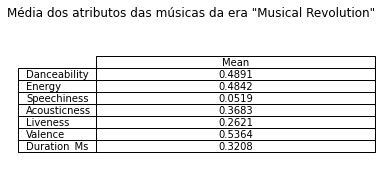

In [20]:
labels=beatles_songs[beatles_songs['phase']=="Musical Revolution"].mean(numeric_only=True).index.to_list();
m=beatles_songs[beatles_songs['phase']=="Musical Revolution"].mean(numeric_only=True).values.tolist();
mdf=pd.DataFrame(m, labels);
mdf.columns=['Mean'];
mdf['Mean']=round(mdf['Mean'],4);

fig = plt.figure(figsize = (5, 3))
ax = fig.add_subplot(111)

ax.table(cellText = mdf.values,
          rowLabels = mdf.index.str.title(),
          colLabels = mdf.columns,
          loc = "center",
          cellLoc = "center"
         )
ax.set_title('Média dos atributos das músicas da era "Musical Revolution"',loc='right')

ax.axis("off");

Como as músicas da primeira fase da carreira da banda, eram mais dançantes, mais focadas em ritmos simples e mais alto astral, isso acabam ficando evidente nos altos valores de **"Valence"**, **"Danceability"** e **"Energy"** com relação a seguda fase. A segunda fase da banda apresenta músicas mais cadenceadas, com letras mais soturnas e melodias mais melancólicas, isto também é refletido pelas médias dos atributos. Os valores de **Liveness** e **Duration Ms** são maiores na segunda fase, isto se explica no experimentalismo em que a banda adentrou, com músicas de duração maior e com a utilização de efeitos sonoros(Incluindo de plateia), o que se reflete nas médias dos atributos também.
<br />
<br />
Entretanto a média não é uma métrica muito fidedigna por vezes em relação ao que realmente é o dataset.

#### Variância

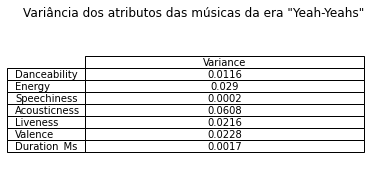

In [21]:
labels=beatles_songs[beatles_songs['phase']=="Yeah-Yeahs"].var(numeric_only=True).index.to_list();
m=beatles_songs[beatles_songs['phase']=="Yeah-Yeahs"].var(numeric_only=True).values.tolist();
mdf=pd.DataFrame(m, labels);
mdf.columns=['Variance'];
mdf['Variance']=round(mdf['Variance'],4);

fig = plt.figure(figsize = (5, 3))
ax = fig.add_subplot(111)

ax.table(cellText = mdf.values,
          rowLabels = mdf.index.str.title(),
          colLabels = mdf.columns,
          loc = "center",
          cellLoc = "center"
         )
ax.set_title('Variância dos atributos das músicas da era "Yeah-Yeahs"',loc='right')

ax.axis("off");

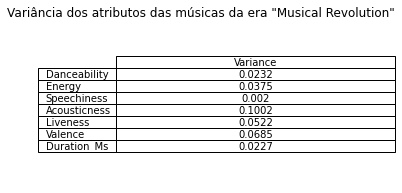

In [22]:
labels=beatles_songs[beatles_songs['phase']=="Musical Revolution"].var(numeric_only=True).index.to_list();
m=beatles_songs[beatles_songs['phase']=="Musical Revolution"].var(numeric_only=True).values.tolist();
mdf=pd.DataFrame(m, labels);
mdf.columns=['Variance'];
mdf['Variance']=round(mdf['Variance'],4);

fig = plt.figure(figsize = (5, 3))
ax = fig.add_subplot(111)

ax.table(cellText = mdf.values,
          rowLabels = mdf.index.str.title(),
          colLabels = mdf.columns,
          loc = "center",
          cellLoc = "center"
         )
ax.set_title('Variância dos atributos das músicas da era "Musical Revolution"',loc='right')

ax.axis("off");

A variância de todos atributos das músicas é maior na era "Musical Revolution" do que na "Yeah-yeahs", isso se deve ao extremo experimentalismo da banda neste período, com música com instrumentos diversos, ritmos não convencionais, temas de letras mais variados, etc...

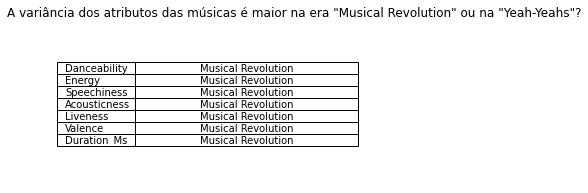

In [23]:
x=(beatles_songs[beatles_songs['phase']=="Yeah-Yeahs"].var(numeric_only=True)<beatles_songs[beatles_songs['phase']=="Musical Revolution"].var(numeric_only=True))

labels=x.index.to_list();
m=x.values.tolist();
mdf=pd.DataFrame(m, labels);
mdf.columns=['phase'];
mdf[mdf['phase']==True]="Musical Revolution";
mdf[mdf['phase']==False]="Yeah-yeahs";

fig = plt.figure(figsize = (4, 3))
ax = fig.add_subplot(111)

ax.table(cellText = mdf.values,
          rowLabels = mdf.index.str.title(),
          colLabels = None,
          loc = "left",
          cellLoc = "center"
         )
ax.set_title('A variância dos atributos das músicas é maior na era "Musical Revolution" ou na "Yeah-Yeahs"?',loc='right')

ax.axis("off");

#### Histograma e gráfico de distribuição

Os gráficos abaixos mostram a distribuição do atributo **"valence"** nas duas fases da banda, na fase "Yeah-Yeahs" é clara a concentração de música com alto valor de **"valence"**, pois as mesmas são músicas em geral mais positivas e com maior sentimento de positividade, há poucas música com **"valence"** menor que 0.4, tais podem ser até considerados como *outliers*, pois são pontos fora da curva desta fase da banda. Exemplo de música que se encaixa neste caso é **"Yesterday"** que trata de temas como solidão e abandono, além de possuir uma melodia melancólica, a mesma possui **valence** de 0,315:

##### Yesterday  - Um outlier musical (<a href="https://www.youtube.com/watch?v=NrgmdOz227I&ab_channel=TheBeatles-Topic" target="_top">Clique aqui para ouvir</a>)<br />

*Yesterday 
Love was such an easy game to play<br />
Now I need a place to hide away<br />
Oh, I believe in yesterday<br />
<br />
Why she had to go? I don't know<br />
She wouldn't say<br />
I said something wrong, now I long<br />
For yesterday*
<br />
<br />
<br />
Enquanto ao olhar para o **"valence"**  das músicas da segunda da fase da banda, percebe-se uma maior variação, o que é explicado pelo experimentalismo da banda e por temas mais diversos nas letras das músicas.

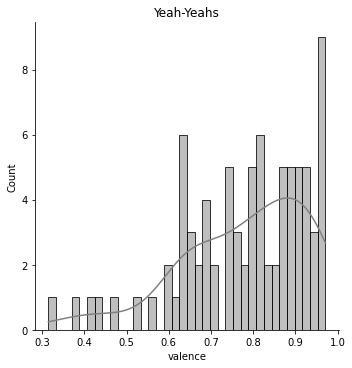

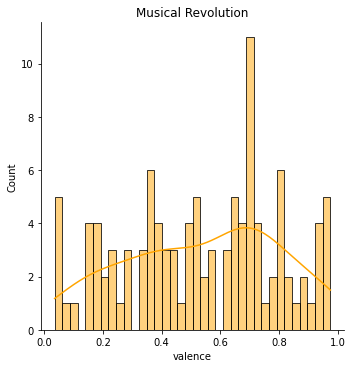

In [24]:
yeah=beatles_songs[beatles_songs['phase']=="Yeah-Yeahs"];
mr=beatles_songs[beatles_songs['phase']=="Musical Revolution"];
sns.displot(yeah['valence'], kde=True, 
             bins=int(180/5), color = 'grey').set(title="Yeah-Yeahs");
sns.displot(mr['valence'], kde=True, 
             bins=int(180/5), color = 'orange').set(title="Musical Revolution");

#### Boxplot

O boxplot reforça a conclusão tirada à cerca dos histogramas e gráficos de distribuição. Demonstra também os ***outliers*** presentes na primeira fase da banda, incluindo a música **Yesterday**.<br />
O boxplot também demonstra como a média não é uma métrica que fornece tanta informação à cerca do dataset.

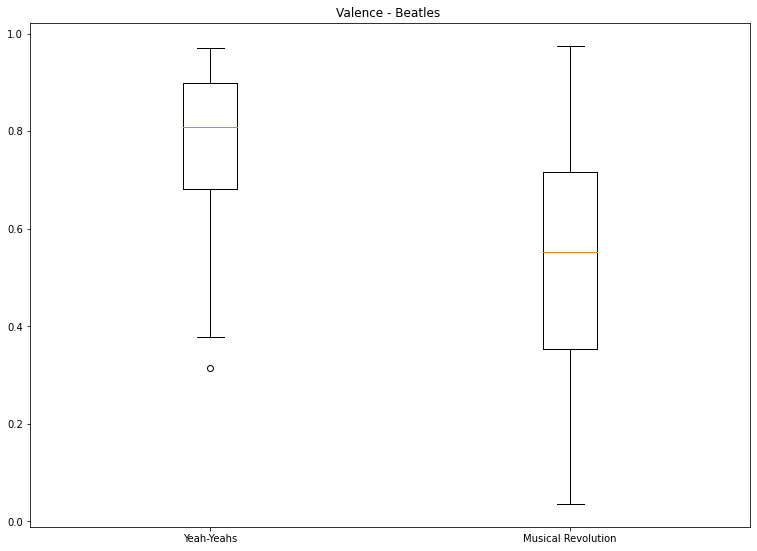

In [25]:
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot([yeah['valence'], mr['valence']])
plt.title("Valence - Beatles ")
ax.set_xticklabels(['Yeah-Yeahs', 'Musical Revolution'])
 
# show plot
plt.show()

#### Correlação 

O mapa de calor abaixo demonstra como os atributos se correlacionam entre si, mostrando os valores de correleção, com isto percebe-se que os atributos com maior correlação entre si são **acousticness** e **energy**, eles mantém uma relação negativa de correlação, pode-se interpretar que as músicas mais acústicas que os Beatles produziam eram menos enérgicas e aceleradas.
<br />
A segunda maior correlação é a entre **valence** e **energy**, eles se correlacionam de maneira positiva, assim interpreta-se que as músicas com maior positividade e melodias alegres dos Beatles são também as músicas mais enérgicas da banda. Olhando as duas músicas colocadas mais acima, a ***Back in the URSS*** e a ***Pepperland in Laid Wast***, que são músicas que se destacam por serem os extremos do atributo **energy**, pode-se perceber um pouco da correlação presente no dataset.

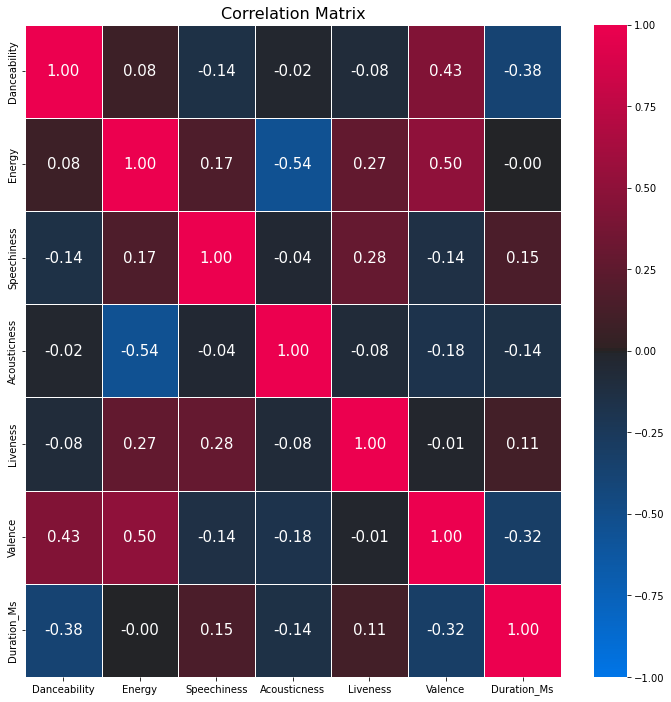

In [26]:
corr_bs=beatles_songs.loc[:, yeah.columns!='song'].corr()

cmap = cmap=sns.diverging_palette(255, 5, as_cmap=True, center='dark', l=50, s=100)

plt.figure(figsize=(12,12));
plt.title('Correlation Matrix', fontsize=16);
sns.heatmap(
    corr_bs, 
    annot=True, 
    fmt='.2f',
    vmin=-1, 
    vmax=1, 
    cmap=cmap, 
    xticklabels=corr_bs.columns.str.title(), 
    yticklabels=corr_bs.columns.str.title(),
    linewidths=1,
    annot_kws={
        "fontsize":"15"
    }
);

plt.show()

#### Curtose

In [27]:
print('\033[1m' + 'Yeah-Yeahs - Curtose' + '\033[1m')
yeah.kurtosis(numeric_only=True)

Yeah-Yeahs - Curtose


danceability   -0.311504
energy         -0.565468
speechiness     8.581493
acousticness   -1.121248
liveness        6.593653
valence         0.499057
duration_ms    -0.127350
dtype: float64

In [28]:
print('\033[1m' + 'Musical Revolution - Curtose' + '\033[1m')
mr.kurtosis(numeric_only=True)

Musical Revolution - Curtose


danceability    -0.339808
energy          -0.189690
speechiness     18.662191
acousticness    -1.171934
liveness         1.214752
valence         -0.969585
duration_ms      5.468571
dtype: float64

Um atributo cuja a curtose varia de maneira significativa entre as fases da banda é o **duration_ms**, na era "Yeah-Yeahs" a curtuse deste atributo é baixa e negativa, olhando os gráficos abaixo pode-se perceber que as durações das músicas da banda nesta fase eram bastante uniformes com pequenas flutuações na sua duração, músicas curtas que variavam pouco em sua duração, em geral músicas com 2 a 3 minutços de duração, o que era o padrão da indústria fonográfica na época, este baixo valor de curtose reflete que as durações da músicas estão bem espalhadas em relação ao intervalo do dataset.<br />
Porém a Curtose deste atributo na era "Musical Revolution" é positivo e tem um valor significamente maior, isto deve-se ao fato dos Beatles extrapolarem os padrões da indústria para as durações da música, o experimentalismo dele proporcionaram músicas curtas como ***Her Majesty** e músicas longas como ***A Day In The Life*** ou a experimentação musical de 9 minutos que é a ***Revolution 9***. Apesar das diversas durações de música neste período, a banda ainda compôs a maioria das suas música com 2 a 3 minutos de duração. A alta curtose reflete esta alta concentração de durações das músicas em um pequeno intervalo em comparação ao intervalo geral do dataset.

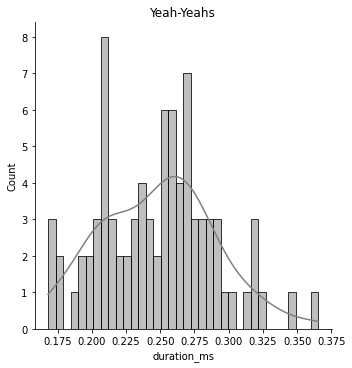

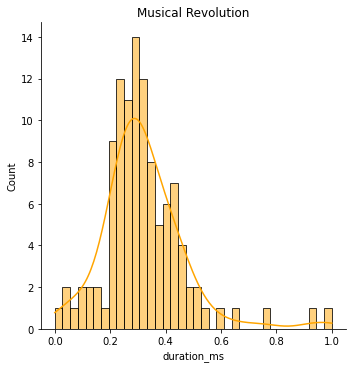

In [29]:
sns.displot(yeah['duration_ms'], kde=True, 
             bins=int(180/5), color = 'grey').set(title="Yeah-Yeahs");
sns.displot(mr['duration_ms'], kde=True, 
             bins=int(180/5), color = 'orange').set(title="Musical Revolution");

## Aprendizado de Máquina

Através de uma Rede Neural ML, se tentarar resolver este problema de classificação

In [30]:
#imports SkLearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn import metrics

In [31]:
#função acurácia
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

Atráves de uma MLP de 7 camadas, realiza-se a clasifficação usando a Validação Cruzada para validar o modelo.

In [32]:
nfolds=6
X=beatles_songs.iloc[:,1:-1].values
y=beatles_songs.iloc[:,-1].values

classifier = MLPClassifier(hidden_layer_sizes=(150,100,50,25,10), max_iter=300,activation = 'relu',solver='adam',random_state=1)
kf = KFold(n_splits=nfolds, shuffle=True, random_state = 21)
ac=[]
for train_index, test_index in kf.split(beatles_songs):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        cm=confusion_matrix(y_pred, y_test)
        ac.append(accuracy(cm))
        
print(f'Acurácia do modelo: {statistics.mean(ac):.4f} +- {statistics.stdev(ac):.4f}');
     

Acurácia do modelo: 0.7617 +- 0.0897


<img src="assets/beatles.jpg" alt="drawing" width="600" height=auto/>